In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./seattleWeather_1948-2017.csv") # df
df.dropna( inplace=True ) # drop all columns that have null values
df.drop_duplicates( inplace=True ) # remvove all duplicates rows
df.columns = ["date", 'prcp', 'tmax', 'tmin', 'rain'] # rename the columns of the shirt
# get all rows in rain col where field is true and in rain col, change their value to  1
df.loc[ df.rain == True, "rain" ] = 1 
df.loc[ df.rain == False, 'rain' ] = 0
# df[['tmin', 'tmax', 'rain']]
SCORE = ['Wont Rain', 'will Rain']
df

,date,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


<AxesSubplot:xlabel='tmin', ylabel='tmax'>

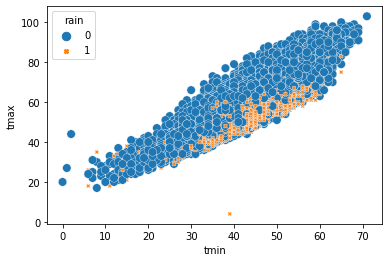

In [262]:
# do a scatter plot of tmax and tmin
# change values of hue values :  sizes=(20, 40)
sns.scatterplot( data=df, x="tmin", y="tmax", hue="rain", style="rain", size="rain", legend="full", )

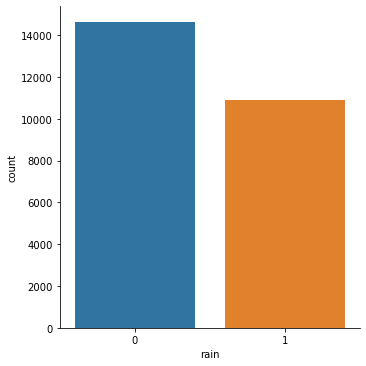

In [263]:
# get a bar plot of the max and min, show that it has rain not rain a lot.
sns.catplot(data=df, kind="count", x="rain", )

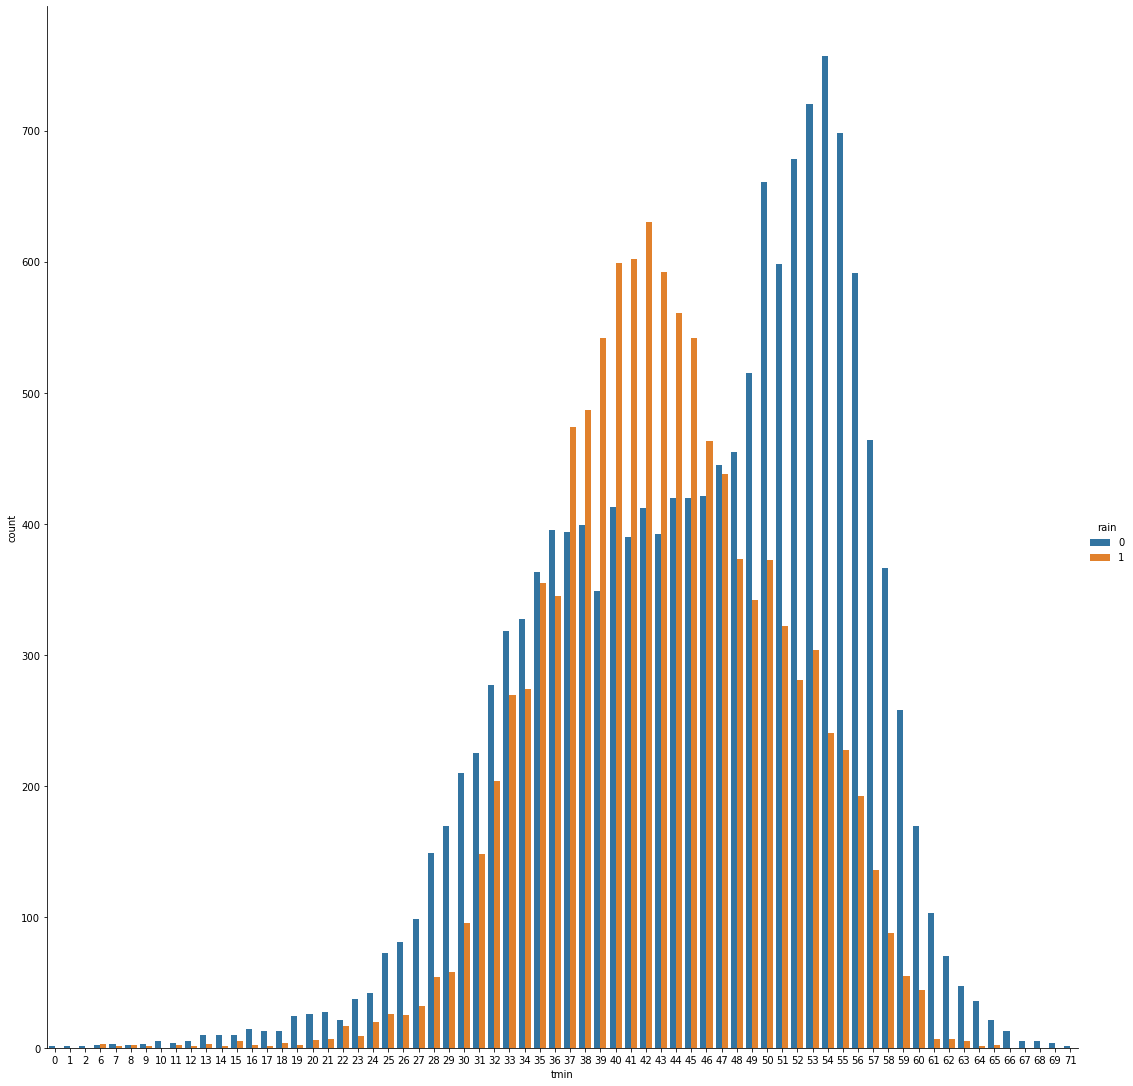

In [264]:
# plot tmin and tmax and hue of rain in scatter plot
sns.catplot(data=df, x="tmin", hue="rain", kind="count", height=15)
# plt.xticks( rotation=90 )

In [268]:
# training the model using knn
from sklearn.neighbors import KNeighborsClassifier # used descrete values.
from sklearn.neighbors import KNeighborsRegressor # uses continous values.
from sklearn.model_selection import train_test_split
from sklearn import metrics # used for accuracy calculations.
from random import randint

X = df[['tmax', 'tmin']] # extract this columns from the data
Y = df['rain'] # get the target column from the data
# get the train data as tmin and tmax and the test data as either will rain or not 
xTrain, xTest, yTrain, yTest = train_test_split( X, Y, train_size=.75, random_state=42 )

knn = KNeighborsRegressor( n_neighbors=3 ) # model obj var
knn.fit( xTrain, yTrain ) # train the model
yPred = knn.predict( xTest ) # test the model.
print("Accuracy Score : {:.2f}".format( knn.score(xTest, yPred )*100 ), "\n", "*"*30, "" )

# generate 5 user simulated enter pair of max temp and min temp
inupt_ = [ [randint(4, 105),randint(0, 72)] for i in range( 5 ) ]
for i in inupt_:
  print( i, '\tit\'ll rain : {:.2f}{}'.format( knn.predict([ i ])[0] * 100, "%"  ))

Accuracy Score : 100.00 
 ****************************** 
[59, 41] 	it'll rain : 0.00%
[76, 20] 	it'll rain : 0.00%
[78, 45] 	it'll rain : 0.00%
[5, 72] 	it'll rain : 100.00%
[105, 37] 	it'll rain : 0.00%
